In [39]:
##import necessary packages##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
##using pandas load the haberman dataset##
jitendra = pd.read_csv("haberman.csv")

In [41]:
##peek the dataset##
jitendra.head()

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [42]:
##que 3(a). how many number of points##
jitendra.shape

(306, 4)

In [43]:
##There are 306 rows and 4 columns including the class attribute##
##que 3(b). number of features##
##there are three features namely age, operation year and auxillary node present in the dataset##
##que 3(c). how many class##
##There are two class '1' and '2'. '1' means the patient has survived 5 or more years and '2' means the patient is dead within 5 years.##




In [44]:
##que 3(d). data points per class##
jitendra['status'].value_counts()

yes    225
no      80
Name: status, dtype: int64

In [45]:
##so as can be seen above that there are 225 data points belonging to class '1' and 81 datapoints belonging to class '2'.##

In [46]:
##que 4.objectives##
##1.We have to identify which features are useful towards classification using Univariate analysis##
##2.using bivariate analysis we have to see which combination of features are useful in classification##

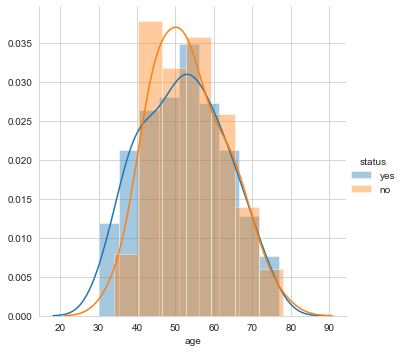

In [47]:
##Univariate analysis(PDF,CDF,Box plot and violin plot)##
sns.FacetGrid(jitendra, hue="status", size=5).map(sns.distplot, 'age').add_legend();
plt.show();

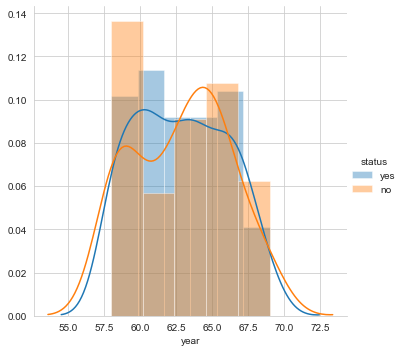

In [48]:
sns.FacetGrid(jitendra, hue="status", size=5).map(sns.distplot, 'year').add_legend();
plt.show();

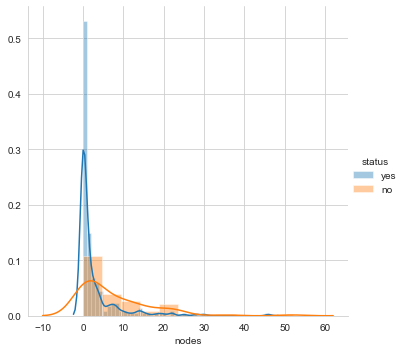

In [49]:
sns.FacetGrid(jitendra, hue="status", size=5).map(sns.distplot, 'nodes').add_legend();
plt.show();

In [50]:
##Observations regarding PDF plot##
##It can be clearly observed that both patient age and operation year graphs are highly overlapped i.e not separable, 
##while auxillary node feature graph shows much much seperation. so auxillary node is very important in this dataset.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


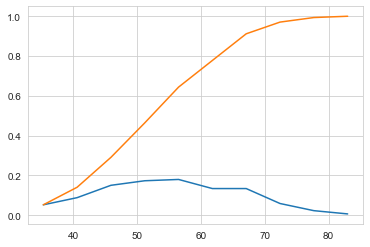

In [51]:
##CDF##
counts,  bin_edges = np.histogram(jitendra['age'], bins=10, density = True)
PDF = counts/(sum(counts))
print(PDF);
print(bin_edges)
cdf = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:], cdf)
plt.show();

In [52]:
#observation
#The above plot shows that patient with age less than 40 the survival status is greater compared to patients with age 70 or above.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


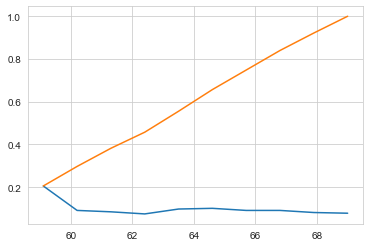

In [53]:
##CDF##
counts,  bin_edges = np.histogram(jitendra['year'], bins=10, density = True)
PDF = counts/(sum(counts))
print(PDF);
print(bin_edges)
cdf = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:], cdf)
plt.show();

In [54]:
#Observation
#The graph shows that patient whose surgery was done between before 1960 means earlier years the probability of survival is more
#but as the number of year goes forward the probability values shows that their survival chances became less.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


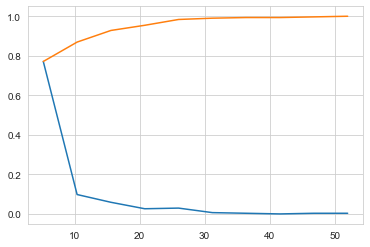

In [55]:
##CDF##
counts,  bin_edges = np.histogram(jitendra['nodes'], bins=10, density = True)
PDF = counts/(sum(counts))
print(PDF);
print(bin_edges)
cdf = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:], cdf)
plt.show();

In [56]:
##observation regarding lymph nodes##
#from the above graph we can clearly state that if the lymph nodes is less than 10 then around 80% of the population survies
#but as number of nodes increased to greater than 25 there is 100% that person will die. so node is an important feature in 
#this data which tells the survival status of the patient.

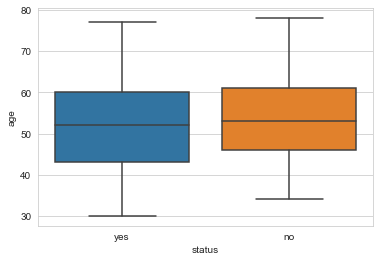

In [57]:
##box plot##
sns.boxplot(x='status', y='age', data = jitendra)
plt.show();

In [58]:
#observation
#as we know that lower margin is 25th percentile, middle line is 50th and upper margin is 75th percentile.
#so by looking into this plot we cannot write if and else statement because the 25th, 50th and 75th percentile for survived and 
#not survived belong to roughly same age group i.e ~43-60 age.

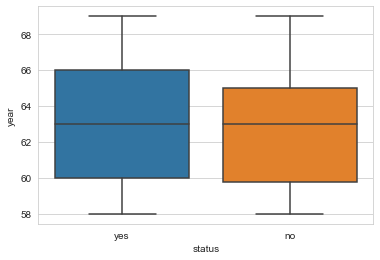

In [59]:
##box plot##
sns.boxplot(x='status', y='year', data = jitendra)
plt.show();

In [60]:
#observation
#the if and else cannot be written clearly in this plot.

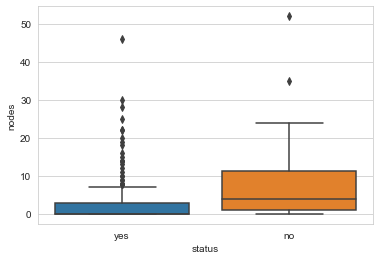

In [61]:
##box plot##
sns.boxplot(x='status', y='nodes', data = jitendra)
plt.show();

In [62]:
##conclusion about box plot##
#the plot roughly shows that there are more than 50% chance of survival if the number of nodes is less.

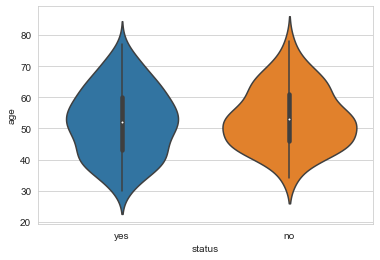

In [63]:
##violin plot##
sns.violinplot(x='status', y='age', data = jitendra, size=8)
plt.show();

In [64]:
#observation is both the status show same years so no conclusion can be drawn.

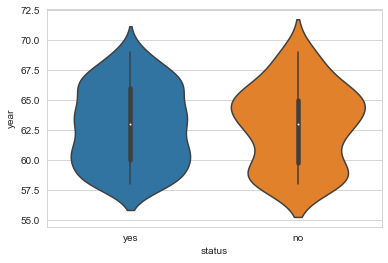

In [65]:
##violin plot##
sns.violinplot(x='status', y='year', data = jitendra, size=8)
plt.show();

In [66]:
#observation is both the status show same years so no conclusion can be drawn.

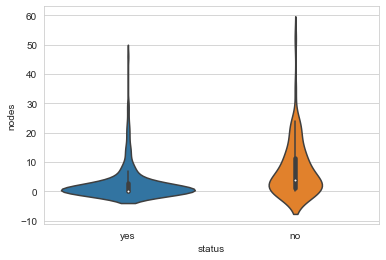

In [67]:
##violin plot##
sns.violinplot(x='status', y='nodes', data = jitendra, size=8)
plt.show();

In [68]:
#observation
#in '1' the persons with lesser nodes survives and it is fatter means the population is more
#whereas in '2' persons have survived with lesser nodes survies but it is thinner means very less peoples survived.

D:\anaconda\ana3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


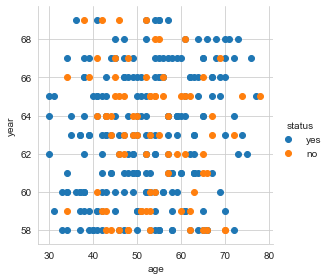

In [69]:
##Bivariate analysis##
#scatter plot age and year#
sns.set_style("whitegrid");
sns.FacetGrid(jitendra, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

In [70]:
##observation
#the points are very much overlapped no significant conclusion drawn.

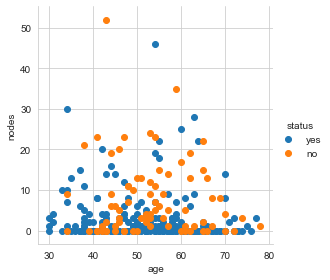

In [71]:
#scatter plot of age and node
sns.set_style("whitegrid");
sns.FacetGrid(jitendra, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

In [72]:
#observation
#the features are not separable

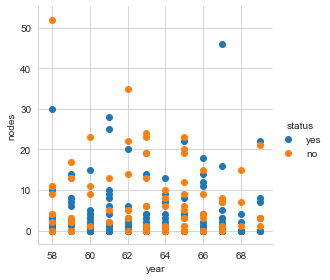

In [73]:
#scatter plot of year and nodes
sns.set_style("whitegrid");
sns.FacetGrid(jitendra, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

In [74]:
#observation
#the points are overlapped so cannot be useful in classification

D:\anaconda\ana3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


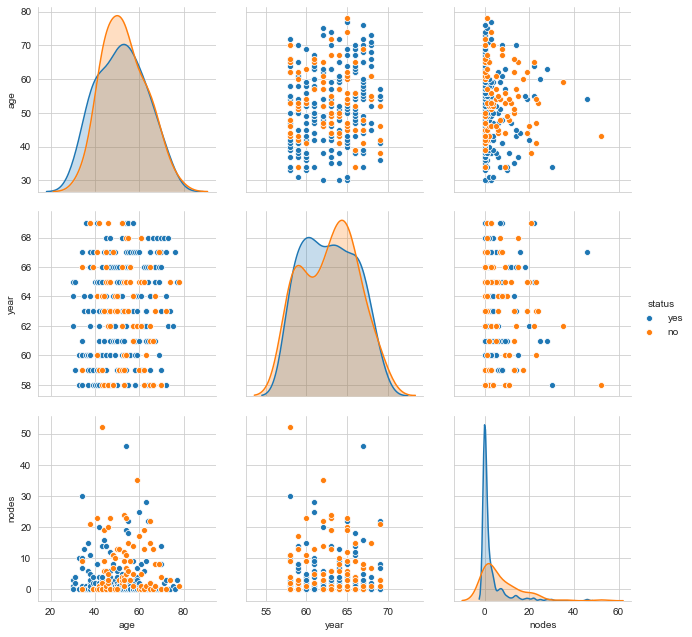

In [75]:
#pair plots
plt.close();
sns.set_style("whitegrid");
sns.pairplot(jitendra, hue="status", size=3);
plt.show()

In [76]:
#observation
#All the plots shows overlapping so we cannot draw any specific conclusion with this data.

In [79]:
#overall main conclusion which i get from this data is less the number of lymph nodes there is very high survival chance almost 
#reaching to 100%.